# Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import requests
import json

In [2]:
filepath = "gs://tom-duong-project-bucket/landing"

filelist = ['20220906.csv','20220907.csv','20220908.csv','20220909.csv','20220910.csv','20220911.csv','20220912.csv',
            '20220913.csv','20220914.csv','20220915.csv','20220916.csv','20220917.csv','20220918.csv','20220919.csv',
            '20220920.csv','20220921.csv','20220922.csv','20220923.csv','20220926.csv','20220928.csv','20220929.csv',
            '20220930.csv','20221001.csv','20221002.csv','20221003.csv','20221004.csv','20221005.csv','20221006.csv', 
            '20221007.csv','20221008.csv','20221009.csv','20221010.csv','20221011.csv','20221012.csv','20221013.csv',
            '20221014.csv','20221015.csv','20221016.csv','20221017.csv','20221018.csv','20221019.csv','20221020.csv', 
            '20221021.csv','20221022.csv','20221023.csv','20221024.csv','20221025.csv','20221026.csv','20221027.csv',
            '20221028.csv','20221029.csv','20221030.csv','20221031.csv']
filelist2 = ['20221101.csv','20221102.csv','20221103.csv',
            '20221104.csv','20221105.csv','20221106.csv','20221107.csv','20221108.csv','20221109.csv','20221110.csv',
            '20221111.csv','20221112.csv','20221113.csv','20221114.csv','20221115.csv','20221116.csv','20221117.csv',
            '20221118.csv','20221119.csv','20221120.csv','20221121.csv','20221122.csv','20221123.csv','20221124.csv',
            '20221125.csv','20221126.csv','20221127.csv','20221128.csv','20221129.csv','20221130.csv']
columns = ["date", "match_ID", "p1_tag", "p1_trophies", "p1_crowns_obtained", 
           "p1_unit1", "p1_unit2", "p1_unit3", "p1_unit4", "p1_unit5", 
           "p1_unit6", "p1_unit7", "p1_unit8", "p2_tag", "p2_trophies", 
           "p2_crowns_obtained", "p2_unit1", "p2_unit2", "p2_unit3", 
           "p2_unit4", "p2_unit5", "p2_unit6", "p2_unit7", "p2_unit8"]

        
def parse_json_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        try:
            json_data = response.json()
            return json_data
        except json.decoder.JSONDecodeError as e:
            print("Error decoding JSON:", e)
    else:
        print("Failed to fetch data from URL:", response.status_code)            

In [3]:
url = "https://royaleapi.github.io/cr-api-data/json/cards_i18n.json"

ID_data = parse_json_from_url(url)

def extract_names_and_ids(parsed_data):
    names_and_ids = {}
    for item in parsed_data:
        if 'name' in item and 'id' in item:
            names_and_ids[item['id']] = item['name']
    return names_and_ids

name_id_data = extract_names_and_ids(ID_data)
print(name_id_data)

{26000000: 'Knight', 26000001: 'Archers', 26000002: 'Goblins', 26000003: 'Giant', 26000004: 'P.E.K.K.A', 26000005: 'Minions', 26000006: 'Balloon', 26000007: 'Witch', 26000008: 'Barbarians', 26000009: 'Golem', 26000010: 'Skeletons', 26000011: 'Valkyrie', 26000012: 'Skeleton Army', 26000013: 'Bomber', 26000014: 'Musketeer', 26000015: 'Baby Dragon', 26000016: 'Prince', 26000017: 'Wizard', 26000018: 'Mini P.E.K.K.A', 26000019: 'Spear Goblins', 26000020: 'Giant Skeleton', 26000021: 'Hog Rider', 26000022: 'Minion Horde', 26000023: 'Ice Wizard', 26000024: 'Royal Giant', 26000025: 'Guards', 26000026: 'Princess', 26000027: 'Dark Prince', 26000028: 'Three Musketeers', 26000029: 'Lava Hound', 26000030: 'Ice Spirit', 26000031: 'Fire Spirit', 26000032: 'Miner', 26000033: 'Sparky', 26000034: 'Bowler', 26000035: 'Lumberjack', 26000036: 'Battle Ram', 26000037: 'Inferno Dragon', 26000038: 'Ice Golem', 26000039: 'Mega Minion', 26000040: 'Dart Goblin', 26000041: 'Goblin Gang', 26000042: 'Electro Wizard',

In [4]:
dataframes = []
dataframes_1 = []
for filename in filelist:
    data_df = pd.read_csv(f"{filepath}/{filename}", sep = ",",header = None)
    data_df.columns = columns
    dataframes.append(data_df) 


In [5]:
def unit_data_cleaning(df: pd.DataFrame, df2: list):
    unit_columns = ["p1_unit1", "p1_unit2", "p1_unit3", "p1_unit4", "p1_unit5",
                    "p1_unit6", "p1_unit7", "p1_unit8", "p2_unit1", "p2_unit2",
                    "p2_unit3", "p2_unit4", "p2_unit5", "p2_unit6", "p2_unit7", "p2_unit8"]
    df['date'] = pd.to_datetime(data_df['date'])
    for col in unit_columns: 
        df[col] = df[col].replace(df2)
       

       

In [6]:
merged_df = pd.concat(dataframes, ignore_index=True)

unit_data_cleaning(merged_df,name_id_data)

/tmp/ipykernel_38016/613650743.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(data_df['date'])


In [7]:
merged_df

,date,match_ID,p1_tag,p1_trophies,p1_crowns_obtained,p1_unit1,p1_unit2,p1_unit3,p1_unit4,p1_unit5,...,p2_trophies,p2_crowns_obtained,p2_unit1,p2_unit2,p2_unit3,p2_unit4,p2_unit5,p2_unit6,p2_unit7,p2_unit8
0,2022-10-31 00:00:17+00:00,72000006,2UP28CLJP,5217,0,Giant,Witch,Valkyrie,Bomber,Dark Prince,...,5272,1,Skeletons,Musketeer,Hog Rider,Ice Spirit,Ice Golem,Cannon,Fireball,The Log
1,2022-10-31 00:00:24+00:00,72000006,YULUVJCG,5560,1,Baby Dragon,Lumberjack,Mega Minion,Night Witch,Electro Giant,...,5532,0,Skeleton Army,Wizard,Giant Skeleton,Sparky,Mega Knight,Magic Archer,Inferno Tower,Arrows
2,2022-10-31 00:03:21+00:00,72000007,R29J9J9LU,5015,0,P.E.K.K.A,Battle Ram,Electro Wizard,Bandit,Royal Ghost,...,6600,1,Skeleton Army,Royal Giant,Zappies,Fisherman,Skeleton King,Mother Witch,Fireball,The Log
3,2022-10-31 00:03:22+00:00,72000007,9ULPU0QL,6600,3,Skeletons,Musketeer,Hog Rider,Mighty Miner,Mortar,...,6600,0,Balloon,Valkyrie,Guards,Miner,Executioner,Bomb Tower,Zap,Tornado
4,2022-10-31 00:04:09+00:00,72000007,8YJC92L0P,6064,0,Giant Skeleton,Royal Giant,Hunter,Zappies,Fisherman,...,6600,1,Skeletons,Giant Skeleton,Fire Spirit,Archer Queen,Cannon,Goblin Drill,Fireball,The Log
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,NaT,72000006,UVQ9QPR8,6500,0,Valkyrie,Ice Wizard,Bowler,Inferno Dragon,Electro Wizard,...,6530,1,Giant,Prince,Dark Prince,Miner,Mega Minion,Electro Wizard,Fireball,Zap
17472,NaT,72000006,YLY08UR,6652,0,Skeletons,Giant Skeleton,Hog Rider,Fire Spirit,Archer Queen,...,6712,1,Skeletons,Giant Skeleton,Hog Rider,Fire Spirit,Archer Queen,Cannon,The Log,Earthquake
17473,NaT,72000323,PVUL9Q2GG,0,0,Witch,Valkyrie,Princess,Bandit,Bats,...,30,1,Electro Wizard,Royal Ghost,Cannon Cart,Magic Archer,Golden Knight,Goblin Drill,Tornado,Barbarian Barrel
17474,NaT,72000007,YUGQJCJV9,6632,0,Knight,Skeletons,Musketeer,Baby Dragon,Barbarian Hut,...,6032,1,Royal Giant,Goblin Gang,Zappies,Fisherman,Skeleton King,Mother Witch,Lightning,The Log


In [8]:
from google.cloud import storage
import io

storage_client = storage.Client()

bucket_name = "tom-duong-project-bucket"
folder_name = "cleaned"

csv_data = merged_df.to_csv(index=False)

csv_bytes = io.BytesIO(csv_data.encode())

blob = storage_client.bucket(bucket_name).blob(f"{folder_name}/merged_data.csv")
blob.upload_from_file(csv_bytes, content_type="text/csv")

print("Data uploaded successfully.")


Data uploaded successfully.


# Feature Engineering


In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Read CSV into Spark DataFrame") \
    .getOrCreate()

gcs_path = "gs://tom-duong-project-bucket/cleaned/merged_data.csv"

spark_df = spark.read.csv(gcs_path, header=True, inferSchema=True)

spark_df.show(truncate=False)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/17 04:05:20 INFO SparkEnv: Registering MapOutputTracker
24/05/17 04:05:20 INFO SparkEnv: Registering BlockManagerMaster
24/05/17 04:05:20 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
24/05/17 04:05:21 INFO SparkEnv: Registering OutputCommitCoordinator


+-------------------+--------+---------+-----------+------------------+--------------+----------------+--------------+-------------+----------------+----------------+--------------+----------------+---------+-----------+------------------+--------------+----------------+--------------+-------------+--------------+------------+-------------+----------------+
|date               |match_ID|p1_tag   |p1_trophies|p1_crowns_obtained|p1_unit1      |p1_unit2        |p1_unit3      |p1_unit4     |p1_unit5        |p1_unit6        |p1_unit7      |p1_unit8        |p2_tag   |p2_trophies|p2_crowns_obtained|p2_unit1      |p2_unit2        |p2_unit3      |p2_unit4     |p2_unit5      |p2_unit6    |p2_unit7     |p2_unit8        |
+-------------------+--------+---------+-----------+------------------+--------------+----------------+--------------+-------------+----------------+----------------+--------------+----------------+---------+-----------+------------------+--------------+----------------+---------

In [10]:
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, LogisticRegressionModel
from pyspark.ml.evaluation import *
from pyspark.ml.tuning import *
import numpy as np

indexer = StringIndexer(inputCols = ["match_ID", "p1_tag", "p1_trophies", "p1_crowns_obtained", 
           "p1_unit1", "p1_unit2", "p1_unit3", "p1_unit4", "p1_unit5", 
           "p1_unit6", "p1_unit7", "p1_unit8", "p2_tag", "p2_trophies", 
           "p2_crowns_obtained", "p2_unit1", "p2_unit2", "p2_unit3", 
           "p2_unit4", "p2_unit5", "p2_unit6", "p2_unit7", "p2_unit8"] , 
                        outputCols = ["match_ID_index", "p1_tag_index", "p1_trophies_index", "p1_crowns_obtained_index", 
           "p1_unit1_index", "p1_unit2_index", "p1_unit3_index", "p1_unit4_index", "p1_unit5_index", 
           "p1_unit6_index", "p1_unit7_index", "p1_unit8_index", "p2_tag_index", "p2_trophies_index", 
           "p2_crowns_obtained_index", "p2_unit1_index", "p2_unit2_index", "p2_unit3_index", 
           "p2_unit4_index", "p2_unit5_index", "p2_unit6_index", "p2_unit7_index", "p2_unit8_index"])

encoder = OneHotEncoder(inputCols=["match_ID_index", "p1_tag_index", "p1_trophies_index", "p1_crowns_obtained_index", 
           "p1_unit1_index", "p1_unit2_index", "p1_unit3_index", "p1_unit4_index", "p1_unit5_index", 
           "p1_unit6_index", "p1_unit7_index", "p1_unit8_index", "p2_tag_index", "p2_trophies_index", 
           "p2_crowns_obtained_index", "p2_unit1_index", "p2_unit2_index", "p2_unit3_index", 
           "p2_unit4_index", "p2_unit5_index", "p2_unit6_index", "p2_unit7_index", "p2_unit8_index"],
 outputCols=["match_ID_vector", "p1_tag_vector", "p1_trophies_vector", "p1_crowns_obtained_vector",
              "p1_unit1_vector", "p1_unit2_vector", "p1_unit3_vector", "p1_unit4_vector", "p1_unit5_vector",
              "p1_unit6_vector", "p1_unit7_vector", "p1_unit8_vector", "p2_tag_vector", "p2_trophies_vector",
              "p2_crowns_obtained_vector", "p2_unit1_vector", "p2_unit2_vector", "p2_unit3_vector",
              "p2_unit4_vector", "p2_unit5_vector", "p2_unit6_vector", "p2_unit7_vector", "p2_unit8_vector"],
dropLast=False)

assembler = VectorAssembler(inputCols=["match_ID_vector", "p1_tag_vector", "p1_trophies_vector", "p1_crowns_obtained_vector",
              "p1_unit1_vector", "p1_unit2_vector", "p1_unit3_vector", "p1_unit4_vector", "p1_unit5_vector",
              "p1_unit6_vector", "p1_unit7_vector", "p1_unit8_vector", "p2_tag_vector", "p2_trophies_vector",
              "p2_crowns_obtained_vector", "p2_unit1_vector", "p2_unit2_vector", "p2_unit3_vector",
              "p2_unit4_vector", "p2_unit5_vector", "p2_unit6_vector", "p2_unit7_vector", "p2_unit8_vector"], outputCol="features")
sdf_pipe =  Pipeline(stages=[indexer, encoder, assembler])


transformed_sdf = sdf_pipe.fit(spark_df).transform(spark_df)



24/05/17 04:05:53 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [11]:
trainingData, testData =transformed_sdf.randomSplit([0.7, 0.3], seed=42)

labelColumn = "p1_crowns_obtained"

lr = LogisticRegression(labelCol=labelColumn)
model = lr.fit(trainingData)



test_results = model.transform(testData)

24/05/17 04:06:08 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:16 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:21 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:22 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:23 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:24 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:25 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:26 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:27 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:27 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:28 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:06:29 WARN DAGScheduler: Broadcasting larg

In [12]:
test_results.select("match_ID", "p1_tag", "p1_trophies", "p1_crowns_obtained", 
           "p1_unit1", "p1_unit2", "p1_unit3", "p1_unit4", "p1_unit5", 
           "p1_unit6", "p1_unit7", "p1_unit8", "p2_tag", "p2_trophies", 
           "p2_crowns_obtained", "p2_unit1", "p2_unit2", "p2_unit3", 
           "p2_unit4", "p2_unit5", "p2_unit6", "p2_unit7", "p2_unit8",'rawPrediction','probability','prediction').show(truncate=False)

24/05/17 04:06:47 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB


+--------+---------+-----------+------------------+--------------+--------------+--------------+--------------+----------------+----------------+-----------+----------------+---------+-----------+------------------+-------------+--------------+--------------+--------------+--------------+--------------+-------------+----------------+--------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------+----------+
|match_ID|p1_tag   |p1_trophies|p1_crowns_obtained|p1_unit1      |p1_unit2      |p1_unit3      |p1_unit4      |p1_unit5        |p1_unit6        |p1_unit7   |p1_unit8        |p2_tag   |p2_trophies|p2_crowns_obtained|p2_unit1     |p2_unit2      |p2_unit3      |p2_unit4      |p2_unit5      |p2_unit6      |p2_unit7     |p2_unit8        |rawPrediction                                                                   |probability                                                       

In [13]:
test_results.groupby("p1_crowns_obtained").pivot('prediction').count().sort("p1_crowns_obtained").show()

24/05/17 04:06:51 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/05/17 04:06:54 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/05/17 04:06:55 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/05/17 04:06:56 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/05/17 04:06:57 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/05/17 04:06:59 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
24/05/17 04:07:01 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB


+------------------+----+----+----+---+
|p1_crowns_obtained| 0.0| 1.0| 2.0|3.0|
+------------------+----+----+----+---+
|                 0|2104|  11|   8|  5|
|                 1|   8|1996|NULL|  4|
|                 2|NULL|   1| 423|  2|
|                 3|   3|   7|   3|602|
+------------------+----+----+----+---+



In [14]:
TP = [2104, 1996, 423, 602]
FP = [24, 2008, 426, 13]
FN = [11, 19, 434, 11]
TN = [3038,3157,4740,4551] 
def calculate_recall_precision(tp, fp, fn, tn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    return accuracy, precision, recall, f1_score

accuracy_0, precision_0, recall_0, f1_score_0 = calculate_recall_precision(TP[0], FP[0], FN[0], TN[0])
accuracy_1, precision_1, recall_1, f1_score_1 = calculate_recall_precision(TP[1], FP[1], FN[1], TN[1])
accuracy_2, precision_2, recall_2, f1_score_2 = calculate_recall_precision(TP[2], FP[2], FN[2], TN[2])
accuracy_3, precision_3, recall_3, f1_score_3 = calculate_recall_precision(TP[3], FP[3], FN[3], TN[3])


In [15]:
zero = [accuracy_0, precision_0, recall_0, f1_score_0]
one = [accuracy_1, precision_1, recall_1, f1_score_1]
two = [accuracy_2, precision_2, recall_2, f1_score_2 ]
three = [accuracy_3, precision_3, recall_3, f1_score_3]

In [16]:
print(zero)
print(one)
print(two)
print(three)

[0.9932393277960209, 0.9887218045112782, 0.9947990543735225, 0.9917511194909263]
[0.7176880222841225, 0.4985014985014985, 0.9905707196029777, 0.663233095198538]
[0.8572140129503569, 0.49823321554770317, 0.4935822637106184, 0.49589683470105506]
[0.9953641104887, 0.9788617886178862, 0.9820554649265906, 0.9804560260586319]


In [17]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


lr1 = LogisticRegression(featuresCol="features", labelCol=labelColumn, rawPredictionCol="rawPrediction")

evaluator = MulticlassClassificationEvaluator(metricName="accuracy", labelCol=labelColumn)

grid = ParamGridBuilder().build()

cv = CrossValidator(estimator=lr1, estimatorParamMaps=grid, evaluator=evaluator, numFolds=3)

cv_model = cv.fit(trainingData)

cv_avg_metrics = cv_model.avgMetrics

cv_avg_metrics


24/05/17 04:07:03 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:06 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:07 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:08 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:08 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:09 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:09 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:10 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:10 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:11 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:11 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:07:12 WARN DAGScheduler: Broadcasting larg

24/05/17 04:08:05 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:06 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:06 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:07 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:07 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:08 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:08 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:09 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:09 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:10 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:10 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB
24/05/17 04:08:11 WARN DAGScheduler: Broadcasting larg

[0.9855163363396778]

# Data Visualization

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, array, explode, count, sum as sum_agg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_38016/458281535.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unit_freq_pd, x='unit', y='count', palette='viridis')


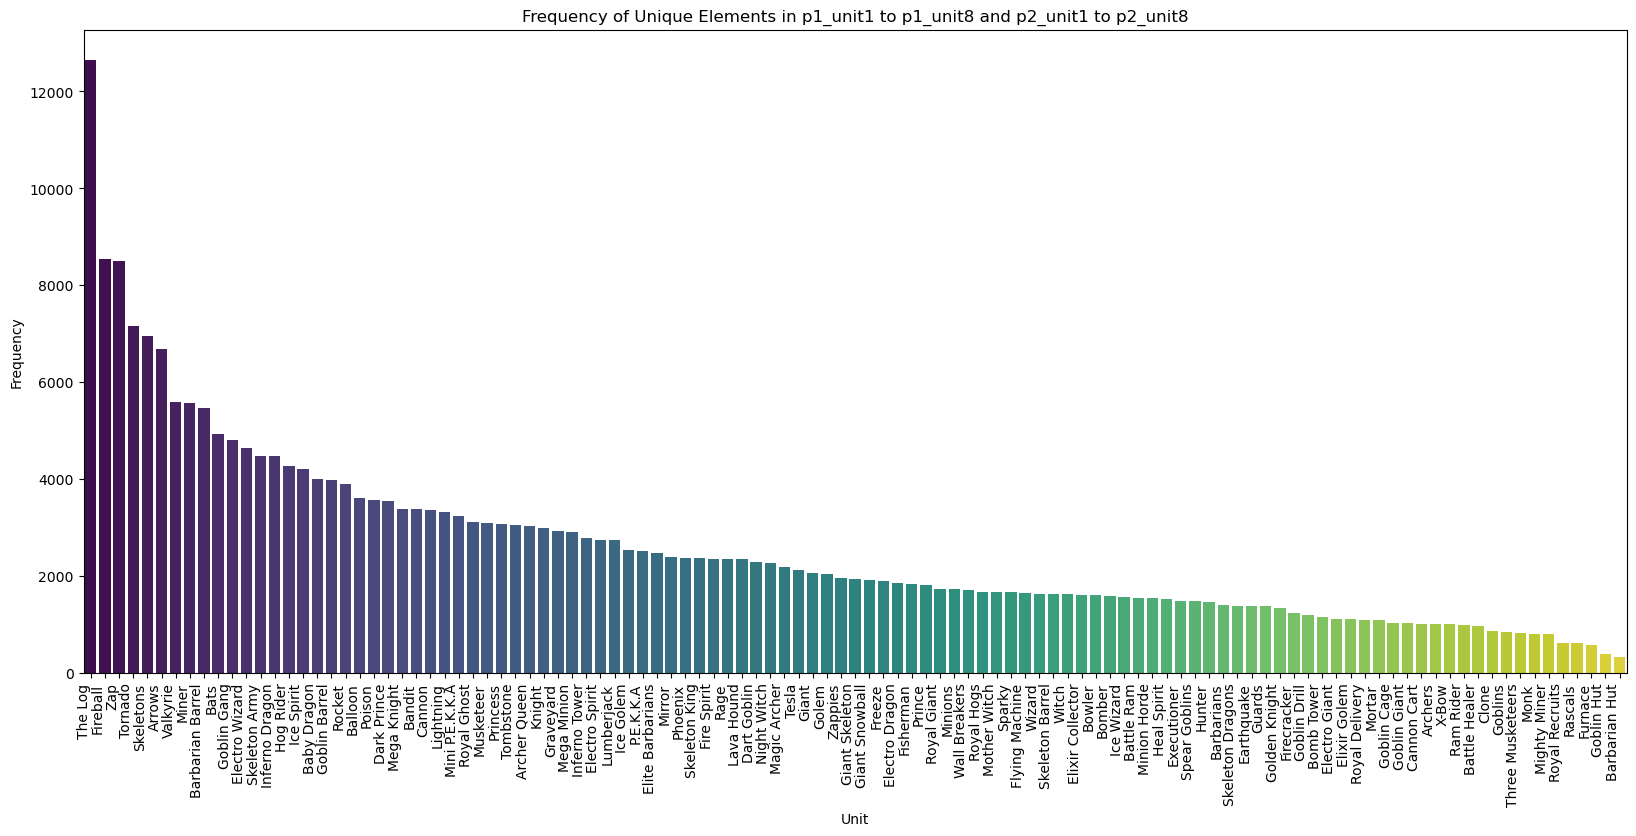

In [19]:

unit_columns = ["p1_unit1", "p1_unit2", "p1_unit3", "p1_unit4", "p1_unit5", 
                "p1_unit6", "p1_unit7", "p1_unit8", "p2_unit1", "p2_unit2", 
                "p2_unit3", "p2_unit4", "p2_unit5", "p2_unit6", "p2_unit7", 
                "p2_unit8"]

combined_units_df = spark_df.select(explode(array(*[col(column) for column in unit_columns])).alias("unit"))

unit_freq_df = combined_units_df.groupBy("unit").count().orderBy("count", ascending=False)

unit_freq_pd = unit_freq_df.toPandas()

plt.figure(figsize=(17, 9))  
sns.barplot(data=unit_freq_pd, x='unit', y='count', palette='viridis')

plt.xticks(rotation=90, ha='right')
plt.xlabel('Unit')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Elements in p1_unit1 to p1_unit8 and p2_unit1 to p2_unit8')
plt.tight_layout(pad=3.0)  
plt.savefig("unit_frequency_plot.png")

plt.show()

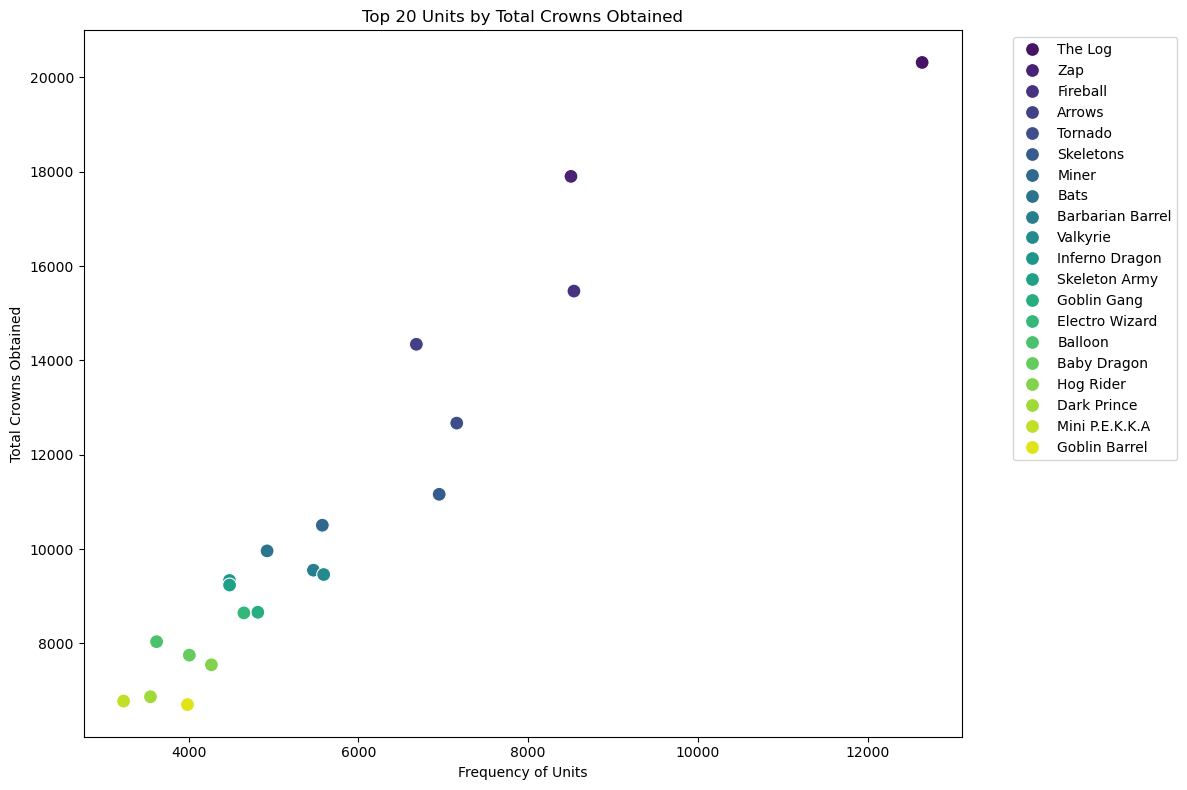

In [20]:

combined_units_df = spark_df.select(
    explode(array(*[col(column) for column in unit_columns])).alias("unit"),
    col("p1_crowns_obtained").alias("p1_crowns"),
    col("p2_crowns_obtained").alias("p2_crowns")
)

unit_freq_crowns_df = combined_units_df.groupBy("unit").agg(
    count("unit").alias("frequency"),
    sum_agg("p1_crowns").alias("total_p1_crowns"),
    sum_agg("p2_crowns").alias("total_p2_crowns")
)

unit_freq_crowns_pd = unit_freq_crowns_df.toPandas()

unit_freq_crowns_pd['total_crowns'] = unit_freq_crowns_pd['total_p1_crowns'] + unit_freq_crowns_pd['total_p2_crowns']

top_20_units_pd = unit_freq_crowns_pd.nlargest(20, 'total_crowns')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_20_units_pd, x='frequency', y='total_crowns', hue='unit', palette='viridis', s=100)

plt.xlabel('Frequency of Units')
plt.ylabel('Total Crowns Obtained')
plt.title('Top 20 Units by Total Crowns Obtained')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("top_20_unit_frequency_vs_crowns_scatter_plot.png")

plt.show()

/tmp/ipykernel_38016/2025778613.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


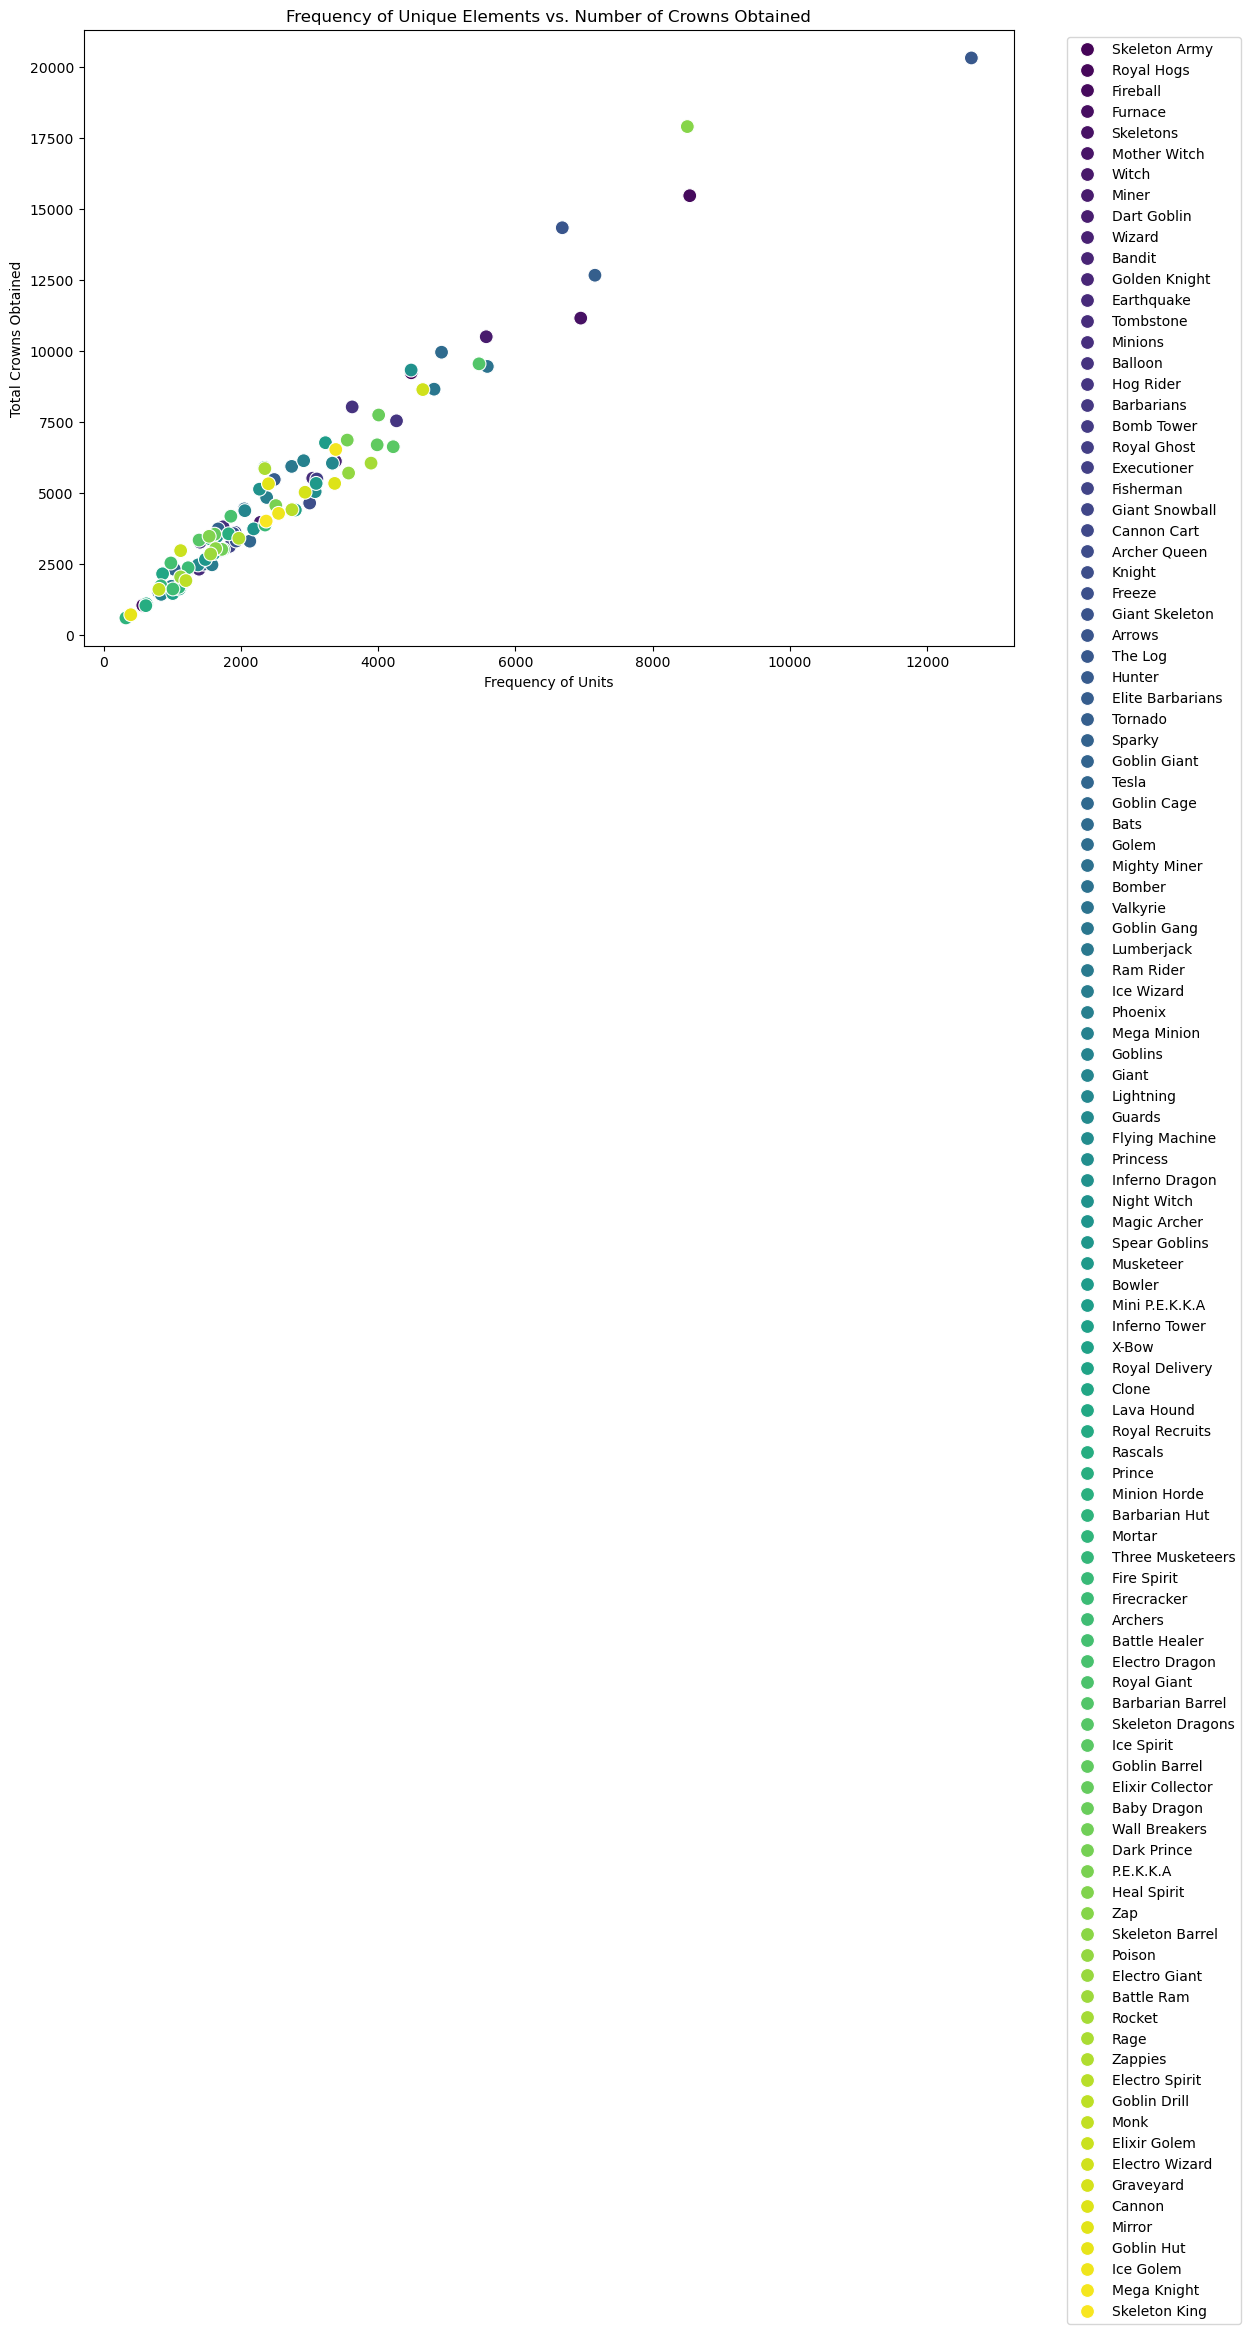

In [21]:
combined_units_df = spark_df.select(
    explode(array(*[col(column) for column in unit_columns])).alias("unit"),
    col("p1_crowns_obtained").alias("p1_crowns"),
    col("p2_crowns_obtained").alias("p2_crowns")
)

unit_freq_crowns_df = combined_units_df.groupBy("unit").agg(
    count("unit").alias("unit_frequency"),
    sum_agg("p1_crowns").alias("total_p1_crowns"),
    sum_agg("p2_crowns").alias("total_p2_crowns")
)

unit_freq_crowns_pd = unit_freq_crowns_df.toPandas()

unit_freq_crowns_pd['total_crowns'] = unit_freq_crowns_pd['total_p1_crowns'] + unit_freq_crowns_pd['total_p2_crowns']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=unit_freq_crowns_pd, x='unit_frequency', y='total_crowns', hue='unit', palette='viridis', s=100)

plt.xlabel('Frequency of Units')
plt.ylabel('Total Crowns Obtained')
plt.title('Frequency of Unique Elements vs. Number of Crowns Obtained')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("unit_frequency_vs_crowns_obtained_scatter_plot.png")

plt.show()

/tmp/ipykernel_38016/176763048.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unit_freq_p1_pd, x='unit', y='frequency', palette='viridis')
/tmp/ipykernel_38016/176763048.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unit_freq_p2_pd, x='unit', y='frequency', palette='viridis')


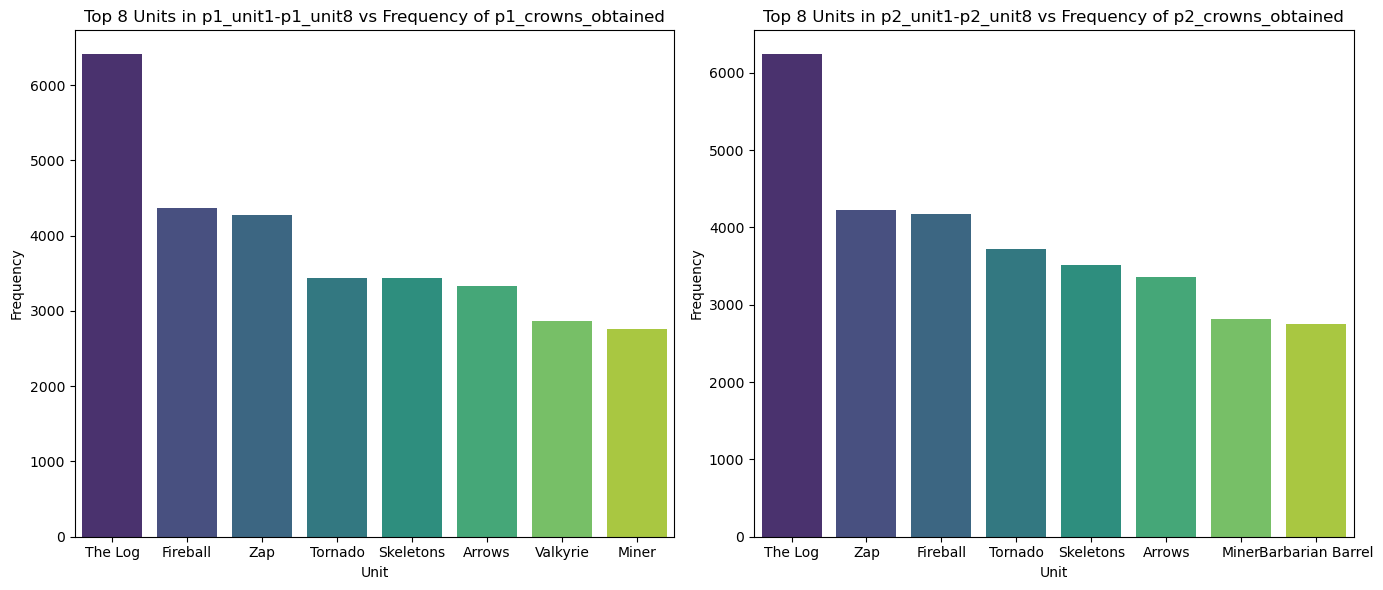

In [22]:
unit_columns_p1 = ["p1_unit1", "p1_unit2", "p1_unit3", "p1_unit4", "p1_unit5", 
                   "p1_unit6", "p1_unit7", "p1_unit8"]
unit_columns_p2 = ["p2_unit1", "p2_unit2", "p2_unit3", "p2_unit4", "p2_unit5", 
                   "p2_unit6", "p2_unit7", "p2_unit8"]
crown_column_p1 = "p1_crowns_obtained"
crown_column_p2 = "p2_crowns_obtained"

unit_freq_p1 = spark_df.select(explode(array(*[col(column) for column in unit_columns_p1])).alias("unit")) \
                       .groupBy("unit").agg(count("unit").alias("frequency")) \
                       .orderBy(col("frequency").desc()).limit(8)
unit_freq_p2 = spark_df.select(explode(array(*[col(column) for column in unit_columns_p2])).alias("unit")) \
                       .groupBy("unit").agg(count("unit").alias("frequency")) \
                       .orderBy(col("frequency").desc()).limit(8)

crown_freq_p1 = spark_df.groupBy(crown_column_p1).count().orderBy(col("count").desc())
crown_freq_p2 = spark_df.groupBy(crown_column_p2).count().orderBy(col("count").desc())

unit_freq_p1_pd = unit_freq_p1.toPandas()
unit_freq_p2_pd = unit_freq_p2.toPandas()
crown_freq_p1_pd = crown_freq_p1.toPandas()
crown_freq_p2_pd = crown_freq_p2.toPandas()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=unit_freq_p1_pd, x='unit', y='frequency', palette='viridis')
plt.xlabel('Unit')
plt.ylabel('Frequency')
plt.title('Top 8 Units in p1_unit1-p1_unit8 vs Frequency of p1_crowns_obtained')

plt.subplot(1, 2, 2)
sns.barplot(data=unit_freq_p2_pd, x='unit', y='frequency', palette='viridis')
plt.xlabel('Unit')
plt.ylabel('Frequency')
plt.title('Top 8 Units in p2_unit1-p2_unit8 vs Frequency of p2_crowns_obtained')

plt.tight_layout()
plt.show()

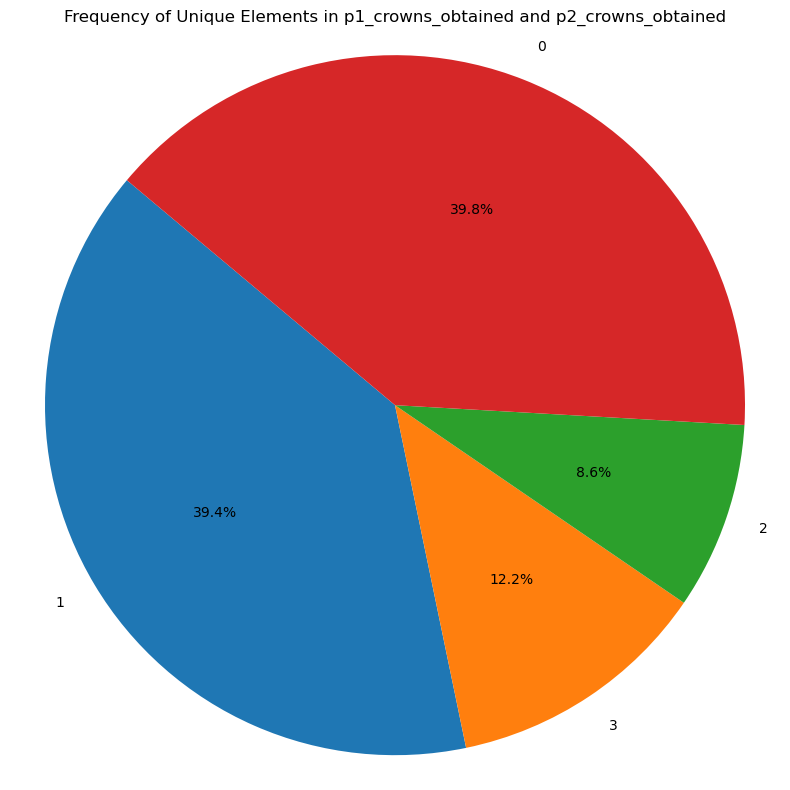

In [23]:
crowns_columns = ["p1_crowns_obtained", "p2_crowns_obtained"]

exploded_crowns_df = spark_df.select(explode(array(*[col(column) for column in crowns_columns])).alias("crown"))

crown_freq_df = exploded_crowns_df.groupBy("crown").count()

labels = crown_freq_df.select("crown").toPandas()["crown"]
sizes = crown_freq_df.select("count").toPandas()["count"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Frequency of Unique Elements in p1_crowns_obtained and p2_crowns_obtained')
plt.tight_layout()
plt.savefig("crowns_obtained_pie_chart.png")
plt.show()

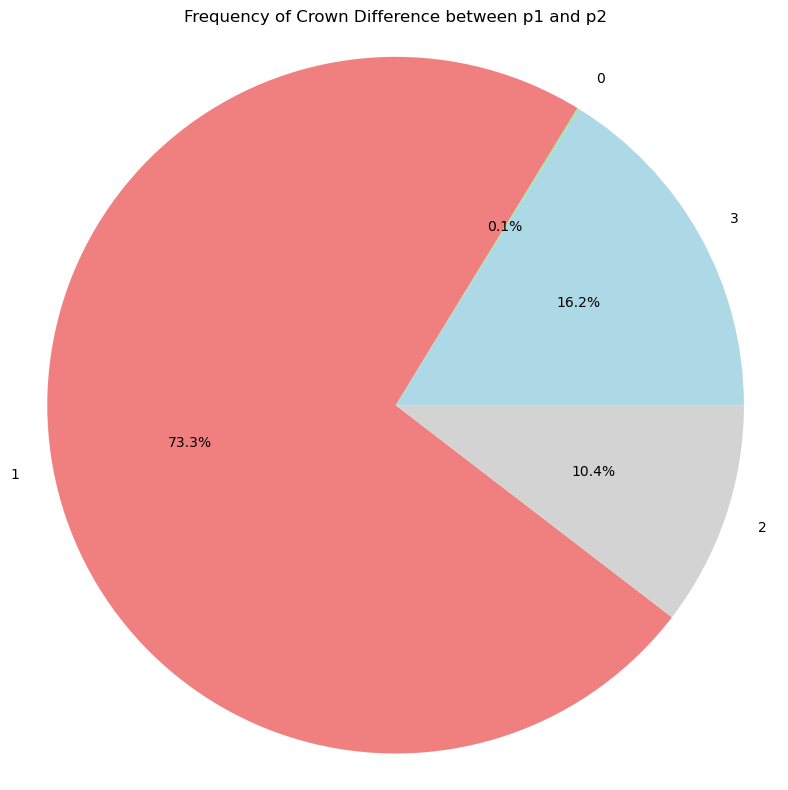

In [24]:
spark_df = spark_df.withColumn("crown_difference", col("p1_crowns_obtained") - col("p2_crowns_obtained"))

spark_df = spark_df.withColumn("grouped_difference", 
                               when(abs(col("crown_difference")) == 1, "1") \
                               .when(abs(col("crown_difference")) == 2, "2") \
                               .when(abs(col("crown_difference")) == 3, "3") \
                               .otherwise(col("crown_difference")))

grouped_diff_df = spark_df.groupBy("grouped_difference").count()

grouped_diff_pd = grouped_diff_df.toPandas()

plt.figure(figsize=(8, 8))
plt.pie(grouped_diff_pd["count"], labels=grouped_diff_pd["grouped_difference"], autopct='%1.1f%%')
plt.title('Frequency of Crown Difference between p1 and p2')
plt.axis('equal')  
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightgray']

for patch, color in zip(plt.gca().patches, colors):
    patch.set_facecolor(color)

plt.tight_layout()
plt.savefig("grouped_crown_difference_pie_chart.png")
plt.show()